In [13]:
#Import de Bibliotecas
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Carregando Dataset

In [14]:
data = pd.read_csv("IrisDataset.csv")
data.sample(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa
142,143,5.8,2.7,5.1,1.9,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
89,90,5.5,2.5,4.0,1.3,Iris-versicolor


# Pre-processamento

In [15]:
data.head(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# descreve o dado
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
# informação sobre o dado
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
# número de amostras para cada classe
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [19]:
# verificação de valores null
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
# normalização dos dados
df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [21]:
# descrever dados normalizados
df_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [22]:
# troca as species que estavam em string para valores numéricos (0,1,2)
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])

In [23]:
# concatena o dado normalizado dos valores de input junto com as classes
df = pd.concat([df_norm, target], axis=1)

# Análise exploratória dos dados

<AxesSubplot:>

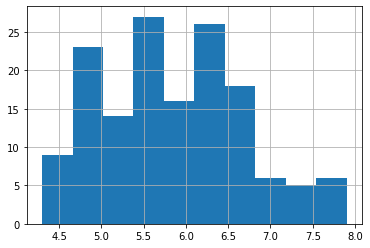

In [24]:
# histogramas
data['SepalLengthCm'].hist()

<AxesSubplot:>

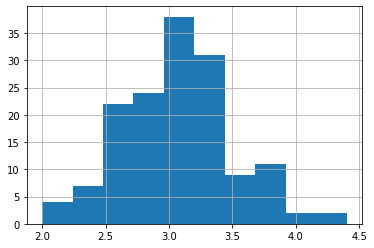

In [25]:
data['SepalWidthCm'].hist()

<AxesSubplot:>

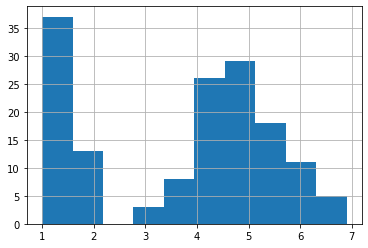

In [26]:
data['PetalLengthCm'].hist()

<AxesSubplot:>

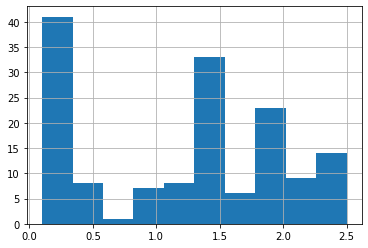

In [27]:
data['PetalWidthCm'].hist()

In [28]:
# plot de dados
colors = ['red', 'black', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

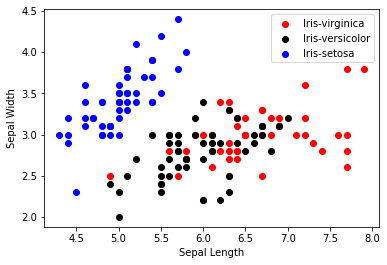

In [29]:
# colocando uma cor para cada espécie de iris e plotando as propriedades "sepal length" e "sepal width"
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

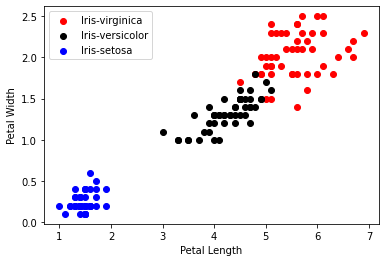

In [30]:
# colocando uma cor para cada espécie de iris e plotando as propriedades "petal length" e "petal width"
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

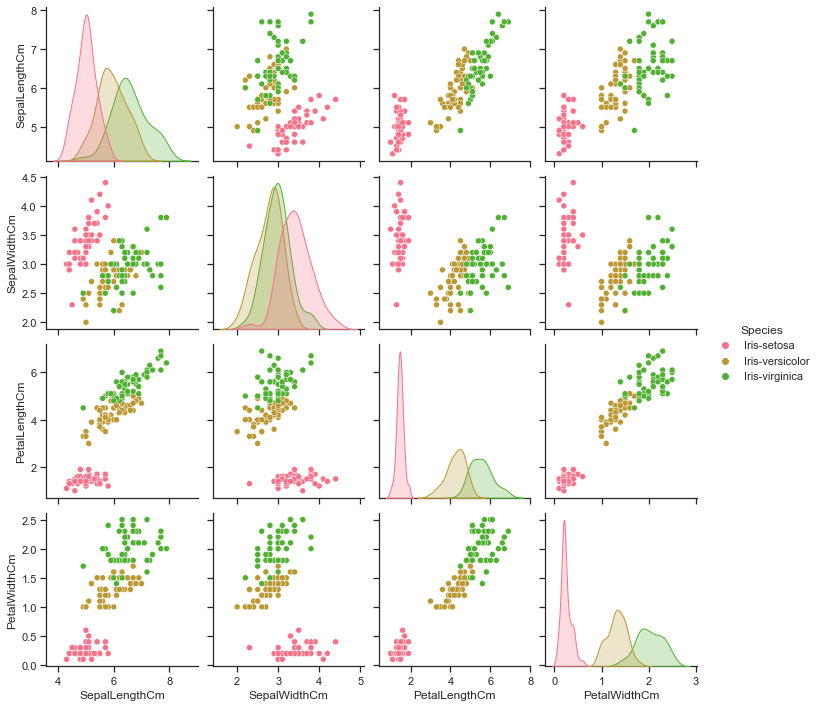

In [31]:
# plot dos pares de dados para cada tipo de característica

sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(data.iloc[:,1:6],hue="Species")

# Matriz de Correlação

A matriz de correlação é uma tabela que mostra os coeficientes de correlação entre as variáveis. Cada célula da tabela mostra a correlação entre duas variáveis. O valor está na faixa de -1 a 1. Se duas variáveis ​​têm alta correlação, podemos desprezar uma variável dessas duas.

In [32]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Split no conjunto de dados para treino e teste, tendo o conjunto de teste 33% de representação

In [33]:
train, test = train_test_split(df, test_size = 0.3)
trainX = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# pegando os dados de treino
trainY=train.Species # saída do conjunto de dados de treino
testX= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # pegando os dados de teste
testY =test.Species   # saída do conjunto de dados de teste
trainX.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
64,0.361111,0.375000,0.440678,0.500000
111,0.583333,0.291667,0.728814,0.750000
21,0.222222,0.708333,0.084746,0.125000
17,0.222222,0.625000,0.067797,0.083333
114,0.416667,0.333333,0.694915,0.958333


In [34]:
trainY.head(5)

64     1
111    2
21     0
17     0
114    2
Name: Species, dtype: int64

In [35]:
testX.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
101,0.416667,0.291667,0.694915,0.750000
1,0.166667,0.416667,0.067797,0.041667
104,0.611111,0.416667,0.813559,0.875000
132,0.583333,0.333333,0.779661,0.875000
85,0.472222,0.583333,0.593220,0.625000


In [36]:
testY.head(5)

101    2
1      0
104    2
132    2
85     1
Name: Species, dtype: int64

In [37]:
# Chamando a classe do MLP no SKLearn com 1 camada intermediária contendo 3 neurônios, learning rate = 0.3 e momentum 0.2
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, ), random_state=1, learning_rate_init=0.3, momentum=0.2, batch_size= 100)


In [38]:
# Fazendo o fit dos dados
clf.fit(trainX, trainY)


MLPClassifier(alpha=1e-05, batch_size=100, hidden_layer_sizes=(3,),
              learning_rate_init=0.3, momentum=0.2, random_state=1,
              solver='lbfgs')

In [39]:
# Coeficientes da camada de entrada
print("Input Layers = ", clf.coefs_[0])


Input Layers =  [[ -0.15288282  -6.17912559  -0.92101435]
 [ -0.36419238 -11.34889181  -0.75109582]
 [ -0.57804993  45.54458181  -0.19020078]
 [  0.0715179   33.15053444   0.3412577 ]]


In [40]:
# Coeficientes da camada intermediária
print("Hidden Layer Weights = ", clf.coefs_[1])


Hidden Layer Weights =  [[  0.3392429   -0.16456953   0.11679708]
 [-16.88068605   7.54432333   8.61840981]
 [  0.93187501  -0.37129962   0.38273617]]


In [ ]:
# Predição da Rede Neural
prediction = clf.predict(testX)
print(prediction)

[0 1 0 1 2]


In [ ]:
print(testY.values)

[0 1 0 1 2]


In [ ]:
# Acurácia da rede neural
print('The accuracy of the Multi-layer Perceptron is: ',metrics.accuracy_score(prediction,testY))

The accuracy of the Multi-layer Perceptron is:  1.0
